In [46]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction import text 
from sklearn.feature_selection import SelectKBest, chi2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import re

In [95]:
# Additional variables
unigram_vec = CountVectorizer(ngram_range=(1, 1))
bigram_vec = CountVectorizer(ngram_range=(2, 2))
trigram_vec = CountVectorizer(ngram_range=(3, 3))

modern = [
    'i', 'a', "i'm", "don't", "it's", "i'm", "don't", "it's", "you're",
    "can't", "that's", 'hey', "we're", 'did', "they're", "there's", "he's",
    "didn't", "i've", "what's", 'hi', 'got', 'happened', 'okay', 'yeah', 'oh' 
]

historical = [
    
]

modern_stop_words = list(text.ENGLISH_STOP_WORDS.union(modern))
# historical_stop_words = text.ENGLISH_STOP_WORDS.union()

In [3]:
# Supplemental Shakespeare Data
"""
COMEDIES
All's Well That Ends Well
As You Like It
Comedy of Errors
Love's Labour's Lost
Measure for Measure
Merchant of Venice
Merry Wives of Windsor
Midsummer Night's Dream
Much Ado about Nothing
Taming of the Shrew
Tempest
Twelfth Night
Two Gentlemen of Verona
Winter's Tale
HISTORIES
Henry IV, Part I
Henry IV, Part II
Henry V
Henry VI, Part I
Henry VI, Part II
Henry VI, Part III
Henry VIII
King John
Pericles
Richard II
Richard III
TRAGEDIES
Antony and Cleopatra
Coriolanus
Cymbeline
Hamlet
Julius Caesar
King Lear
Macbeth
Othello
Romeo and Juliet
Timon of Athens
Titus Andronicus
Troilus and Cressida
"""

manual_play_list = [
    "All's Well That Ends Well",
    "As You Like It",
    "Comedy of Errors",
    "Love's Labour's Lost",
    "Measure for Measure",
    "Merchant of Venice",
    "Merry Wives of Windsor",
    "Midsummer Night's Dream",
    "Much Ado about Nothing",
    "Taming of the Shrew",
    "Tempest",
    "Twelfth Night",
    "Two Gentlemen of Verona",
    "Winter's Tale",
    "Henry IV, Part I",
    "Henry IV, Part II",
    "Henry V",
    "Henry VI, Part I",
    "Henry VI, Part II",
    "Henry VI, Part III",
    "Henry VIII",
    "King John",
    "Pericles",
    "Richard II",
    "Richard III",
    "Antony and Cleopatra",
    "Coriolanus",
    "Cymbeline",
    "Hamlet",
    "Julius Caesar",
    "King Lear",
    "Macbeth",
    "Othello",
    "Romeo and Juliet",
    "Timon of Athens",
    "Titus Andronicus",
    "Troilus and Cressida",
]

In [4]:
# Set up information about Shakespeare's Plays
play_info = {
    'time_period': [
        '1580 - 1590',
        '1590 - 1600',
        '1590 - 1600',
        '1590 - 1600',
        '1590 - 1600', 
        '1590 - 1600', 
        '1590 - 1600', 
        '1590 - 1600', 
        '1590 - 1600', 
        '1590 - 1600', 
        '1590 - 1600', 
        '1590 - 1600', 
        '1590 - 1600', 
        '1590 - 1600', 
        '1590 - 1600', 
        '1590 - 1600', 
        '1590 - 1600', 
        '1590 - 1600', 
        '1590 - 1600', 
        '1590 - 1600', 
        '1600 - 1610',
        '1600 - 1610',
        '1600 - 1610',
        '1600 - 1610',
        '1600 - 1610',
        '1600 - 1610',
        '1600 - 1610',
        '1600 - 1610',
        '1600 - 1610',
        '1600 - 1610',
        '1600 - 1610',
        '1600 - 1610',
        '1600 - 1610',
        '1600 - 1610',
        'After 1610',
        'After 1610',
        'After 1610',
        'After 1610'],
    'play': [
        "The Taming of the Shrew",
        "Henry VI Part II",
        "Henry VI Part III",
        "The Two Gentlemen of Verona",
        "Titus Andronicus",
        "Henry VI Part I",
        "Richard III",
        "The Comedy of Errors",
        "Love's Labour's Lost",
        "A Midsummer Night's Dream",
        "Romeo and Juliet",
        "Richard II",
        "King John",
        "The Merchant of Venice",
        "Henry IV Part I",
        "Henry IV Part II",
        "Much Ado About Nothing",
        "Henry V",
        "As You Like It",
        "Julius Caesar",
        "Hamlet",
        "The Merry Wives of Windsor",
        "Twelfth Night",
        "Troilus and Cressida",
        "Othello",
        "Measure for Measure",
        "All's Well That Ends Well",
        "Timon of Athens",
        "King Lear",
        "Macbeth",
        "Antony and Cleopatra",
        "Coriolanus",
        "Pericles",
        "Cymbeline",
        "The Winter's Tale",
        "The Tempest",
        "Henry VIII",
        "The Two Noble Kinsmen"],
    'description': [
        "Considered to be one of Shakespeare's earliest works, the play is generally believed to have been written before 1592",
        "Believed to have been written in 1591 and Shakespeare's first play based on English history", 
        "Written immediately after Part II, a short version of the play was published in Octavo form in 1595",
        "Known to be written around the 1590s as it was mentioned by Francis Meres in his list of Shakespeare's plays in 1598, no firm evidence for a particular year",
        "Written in 1591/92, with its first performance possibly in January 1594",
        "Generally assumed to be the 'harey the vi' performed at the Rose Theatre in 1592",
        "Could have been written in 1592, shortly before the plague struck, or in 1594 when the theatres reopened post-plague",
        "Was possibly written for Gray's Inn Christmas festivities for the legal profession in December 1594",
        "An edition of the play in 1598 refers to it being 'presented before her Highness [Queen Elizabeth] this last Christmas', and most scholars date it to 1595-96",
        "Often dated to 1595-96. Reference in Act 1 Scene 2 to courtiers being afraid of a strange lion may allude to an incident in Scotland in 1594",
        "Astrological allusions and earthquake reference may suggest composition in 1595-96",
        "Typically dated 1595-96. Described in 1601 as 'old and long out of use'",
        "Written between 1595 and 1597; an anonymous two-part King John was published in 1591 but Shakespeare's version is stylistically close to later histories",
        "Registered for publication in 1598, reference to a ship Andrew suggests late 1596 or early 1597 as a Spanish ship of the name was captured around that time",
        "Probably written and first performed 1596-97, registered for publication in 1598",
        "Written around 1597-98 and registered for publication in 1600, both parts are based on Holinshed's Chronicles",
        "Late 1598, not mentioned in Francis Meres's 1598 list of Shakespeare's plays but included the role Dogberry for Will Kemp, a comic actor who left the company in early 1599",
        "Written in 1599, mentions a 'general... from Ireland coming', could be referring to the Earl of Essex's Irish expedition in 1599",
        "Typically dated late 1599. Not mentioned in Francis Meres's 1598 list of Shakespeare's plays, unless originally called Love's Labour's Won",
        "1599. Not mentioned in Meres's 1598 list of plays, seen at the Globe by Swiss visitor Thomas Platter in 1599",
        "Dated around 1600, registered for publication in summer 1602. There are allusions to Julius Caesar, which was written in 1599",
        "Estimated 1597 - 1601, though an allusion to the Order of the Garter might indicate that it was performed at the Garter Feast in 1597",
        "1601. Not mentioned in Meres's 1598 list of plays and alludes to a map first published in 1599",
        "Dated 1601-02, registered for publication early 1603 and alludes to the play Thomas Lord Cromwell, which was registered for publication in 1602",
        "Dated 1604 though some argue for a slightly earlier date. It is recorded to have been performed in court in November 1604",
        "Performed at court for Christmas 1604, probably written earlier the same year",
        "No strong evidence for date written or first performed, but it is usually dated 1603-06 on stylistic grounds",
        "Estimated 1604-06 based on stylistic similarity to King Lear",
        "Dated 1605-06. Performed at court December 1606 and seems to refer to eclipses of September and October 1605",
        "1606. Certainly more Jacobean than Elizabethan based on the play's several compliments to King James",
        "Dated 1606-07, registered for publication in 1608 and perhaps performed at court in 1606 or 1607",
        "Perhaps written in 1608. Allusion to 'coal of fire upon ice' in Act 1 could refer to the great frost of winter in 1607/08",
        "1608. Registered for publication in 1608; Wilkin's novel The Painful Adventures of Pericles, cashing in on the success of the play, was published in 1608",
        "1610. A performance in 1611 is recorded. Theatres were reopened in spring 1610 after a long closure due to the plague",
        "1611. Performed at the Globe May 1611; dance of satyrs apparently borrows from a court entertainment of January 1611",
        "1611. Performed at court in November 1611; uses source material not available before autumn 1610",
        "1613. The first Globe theatre burnt down in a fire that started during a performance of the play on 29 June 1613",
        "1613-14; 'our loss' in the Prologue probably refers to the Globe fire of 1613"]    
}
play_info_df = pd.DataFrame(play_info)

In [5]:
# Import Shakespeare
plays_df = pd.read_csv('Data/Shakespeare_data.csv')

# Discover and remove stage direction data
stage_direction = plays_df[plays_df['ActSceneLine'].isnull()]
character_lines = plays_df[~plays_df['ActSceneLine'].isnull()]

# Split out the code by play
plays = character_lines['Play'].unique()
num_plays = plays.size

shakespeare_df = character_lines[['Player', 'PlayerLine']].reset_index()

In [6]:
# Import 10 Things I Hate About You
with open('Data/10 Things I Hate About You script by Karen McCullah Lutz, Kirsten Smith & William Shakespeare.txt') as file:
        lines = file.readlines()

ten_things = [['Player', 'PlayerLine']]
player = ''
player_line = ''
for index, line in enumerate(lines):
    if index < 9:
        continue
    line = line.replace('\n', '')
    if line.startswith('                     '):
        player = line.strip().title()
        continue
    if line.startswith('              ('):
        continue
    if line.startswith('       '):
        player_line += line
        continue
    if (line == ''):
        if player_line != '':
            ten_things.append([player, player_line])
        player = ''
        player_line = ''
        continue

ten_things_df = pd.DataFrame(ten_things[:][1:], columns=ten_things[0])

In [7]:
# Import She's The Man
with open('Data/shes_the_man.txt') as file:
        lines = file.readlines()
shes_man = [['PlayerLines']]
for index, line in enumerate(lines):
    line = line.replace('-', '').strip()
    if index < 3:
        continue
    if (line.strip() == ''):
        continue
    shes_man.append([line])
shes_man_df = pd.DataFrame(shes_man[:][1:], columns=shes_man[0])

In [8]:
# Import The Lion King
with open('Data/the_lion_king.txt') as file:
        lines = file.readlines()

lion_king = [['Player', 'PlayerLines']]
for index, line in enumerate(lines):
    char_lines = line.split('\t')
    if len(char_lines) < 2:
        continue
    lion_king.append([char_lines[0], char_lines[1]])
    
lion_king_df = pd.DataFrame(lion_king[:][1:], columns=lion_king[0])

In [96]:
# Analyze Warm Bodies
with open('Data/warm_bodies.txt') as file:
        lines = file.readlines()

warm_bodies = [['PlayerLines']]
for index, line in enumerate(lines):
    line = line.strip()
    if line == '' or line == '\n':
        continue
    warm_bodies.append([line])
    
warm_bodies_df = pd.DataFrame(warm_bodies[:][1:], columns=warm_bodies[0])

# Vectorizer Builds
wb_trigram_vec = CountVectorizer(ngram_range=(3, 3), stop_words=modern_stop_words, token_pattern=r"\w+\S*\w|\w")

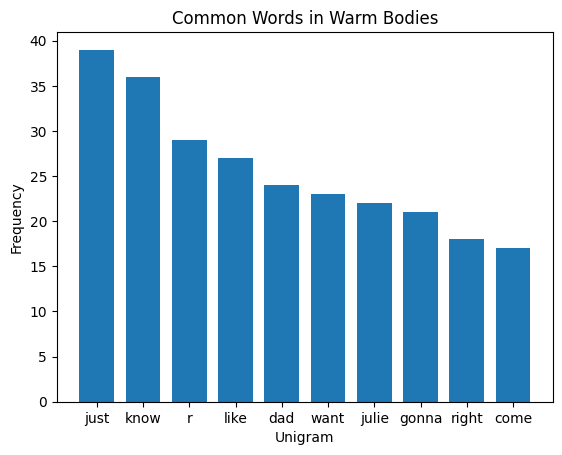

In [109]:
# Unigram Analysis
wb_unigram_vec = CountVectorizer(ngram_range=(1, 1), stop_words=modern_stop_words, token_pattern=r"\w+\S*\w|\w")

wb_unigram = wb_unigram_vec.fit_transform(warm_bodies_df['PlayerLines'])
uni_features = wb_unigram_vec.get_feature_names_out()

wb_uni_df = pd.DataFrame(wb_unigram.toarray(), columns=uni_features)
wb_uni_df = wb_uni_df.sum().sort_values(ascending=False).reset_index()[:10]
wb_uni_df.columns = ['unigram', 'count']

# Plot Histogram of Unigrams
plt.title("Common Words in Warm Bodies")
plt.xlabel("Unigram")
plt.ylabel("Frequency")
plt.bar(wb_uni_df['unigram'].values, wb_uni_df['count'].values, width=0.75)
plt.show()

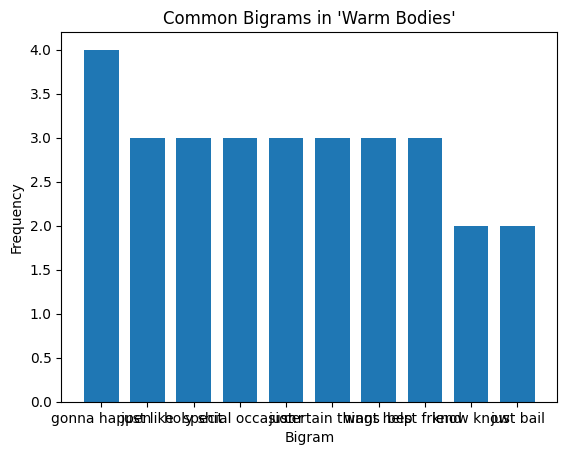

In [112]:
# Bigram Analysis
wb_bigram_vec = CountVectorizer(ngram_range=(2, 2), stop_words=modern_stop_words, token_pattern=r"\w+\S*\w|\w")

wb_bigram = wb_bigram_vec.fit_transform(warm_bodies_df['PlayerLines'])
wb_bi_features = wb_bigram_vec.get_feature_names_out()

wb_bi_df = pd.DataFrame(wb_bigram.toarray(), columns=wb_bi_features)
wb_bi_df = wb_bi_df.sum().sort_values(ascending=False).reset_index()[:10]
wb_bi_df.columns = ['unigram', 'count']

# Plot Histogram of Unigrams
plt.title("Common Bigrams in 'Warm Bodies'")
plt.xlabel("Bigram")
plt.ylabel("Frequency")
plt.bar(wb_bi_df['unigram'].replace(' ', '\n').values, wb_bi_df['count'].values, width=0.75)
plt.show()

In [10]:
from sklearn.datasets import load_digits
from sklearn.feature_selection import SelectKBest, chi2
X, y = load_digits(return_X_y=True)
# y
# y.shape

X_new = SelectKBest(chi2, k=20).fit_transform(X, y)
X_new.shape

(1797, 20)

In [11]:
# Import Faustus
with open('Data/Dr_Faustus.txt') as file:
        lines = file.readlines()

player_line = ""
player = ""
line_number = 0
dr_faustus = [['LineNumber', 'Player', 'PlayerLines']]

for index, line in enumerate(lines):
    if index < 95:
        continue
    if line.startswith("FOOTNOTES:"):
        break    
    if line.startswith("          "):             # Skip stage direction
        continue
    line = re.sub(r"\[.*\]", "", line).strip()    # Line contains [text]/" "
    match = re.search(r".+?(?=\. \w+?)", line)    # Looking for players lines
    if match and match.group().isupper():         # Text is all caps
        player = match.group()
        dr_faustus.append([line_number, player, match.string[match.span()[1] + 2:]])
        line_number += 1
        continue
    if line != "":
        dr_faustus.append([line_number, player, line])
        line_number += 1

dr_faustus_df = pd.DataFrame(dr_faustus[:][1:], columns=dr_faustus[0])